# Notebooks to merge subject information from imaging, clinical assessments and other sources of data
## Groups: 'PD', 'Prodromal', 'SWEDD', 'Control', 'Phantom', 'GenReg Unaff'

In [1]:
# from pathlib import Path
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd

#PATH
main_dir = Path("/scratch/mr_proc")
out_dir = Path("/output")
data_dir = main_dir / 'tab_data' 

#ppmi_dcm_file = data_dir / 'ppmi_dicomInfo.tsv'           # Inormation from dicom headers.
ppmi_img_dl_file = data_dir / 'PPMI_3T_sdMRI_3_07_2022.csv'  # Inormation from download database.
ppmi_moca_file  = data_dir / 'Montreal_Cognitive_Assessment__MoCA_.csv'  # Inormation from download database.
ppmi_updrs3_file  = data_dir / 'MDS_UPDRS_Part_III.csv'  # Inormation from download database.

# Read table
#ppmi_dcm_data = pd.read_csv(ppmi_dcm_file, sep='\t')
ppmi_img_dl_data  = pd.read_csv(ppmi_img_dl_file, sep=',')
ppmi_img_col_sel = ['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description']
ppmi_img_dl_data = ppmi_img_dl_data.loc[:, ppmi_img_col_sel].copy()
group_sel_list=['PD', 'Prodromal', 'SWEDD', 'Control']
ppmi_img_dl_data = ppmi_img_dl_data[ppmi_img_dl_data.Group.isin(group_sel_list)].copy()
# read clinical data
ppmi_updrs3_data = pd.read_csv(ppmi_updrs3_file, sep=',')
ppmi_moca_data   = pd.read_csv(ppmi_moca_file, sep=',')

220310-18:35:52,179 nipype.utils WARNING:
	 A newer version (1.7.0) of nipy/nipype is available. You are using 1.5.0


/usr/local/miniconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (10,17,18,19,20,21,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
sequence_str  = ['T1', 'MPRAGE', 'DTI'];
len(ppmi_img_dl_data[ppmi_img_dl_data.Description.isin(sequence_str)].Description.unique());
subject_group = ppmi_img_dl_data.loc[:, ['Subject','Group']].copy();
subject_group.groupby('Subject').agg(lambda x: set(x));
subject_group['Subject']=[int(x) for x in subject_group['Subject']]

In [3]:
sequence_str=['T1', 'MPRAGE', 'DTI']
print(len(ppmi_img_dl_data.loc[(ppmi_img_dl_data.Description.str.contains(sequence_str[0]))|(ppmi_img_dl_data.Description.str.contains(sequence_str[1]))|(ppmi_img_dl_data.Description.str.contains(sequence_str[2]))].Subject.unique()))
print(len(ppmi_img_dl_data.loc[(ppmi_img_dl_data.Description.str.contains(sequence_str[0]))|(ppmi_img_dl_data.Description.str.contains(sequence_str[1]))].Subject.unique()))
#print(ppmi_moca_data.columns)
moca_list= ['PATNO', 'EVENT_ID', 'MCAALTTM', 'MCACUBE', 'MCACLCKC', 'MCACLCKN', 'MCACLCKH', 'MCALION', 'MCARHINO',
            'MCACAMEL', 'MCAFDS', 'MCABDS', 'MCAVIGIL', 'MCASER7', 'MCASNTNC',
            'MCAVFNUM', 'MCAVF', 'MCAABSTR', 'MCAREC1', 'MCAREC2', 'MCAREC3',
            'MCAREC4', 'MCAREC5', 'MCADATE', 'MCAMONTH', 'MCAYR', 'MCADAY', 'MCAPLACE', 'MCACITY', 'MCATOT'];
ppmi_moca_data=ppmi_moca_data.loc[:,moca_list].copy();

582
480


MoCA:
{PD}           298
{Prodromal}    145
{Control}       90
{SWEDD}         42
Name: Group, dtype: int64
1     124
6      65
3      61
9      59
4      55
5      52
2      47
8      46
7      37
10     27
11      2
Name: EVENT_ID, dtype: int64
{SC}                                                 114
{SC, V06, V04}                                        53
{SC, V06, V10, V12, V04, V08}                         51
{SC, V06, V10, V04, V08}                              37
{SC, V04}                                             37
                                                    ... 
{SC, V06, V10, V17, V15, V14, V16, V12, V04, V13}      1
{SC, V06, V10, V03, V14, V16, V12, V04, V13, V08}      1
{SC, V06, V10, V14, V12, ST, V08}                      1
{SC, V10, V14, V12, V08}                               1
{SC, V06, V10, ST, V04}                                1
Name: EVENT_ID, Length: 80, dtype: int64


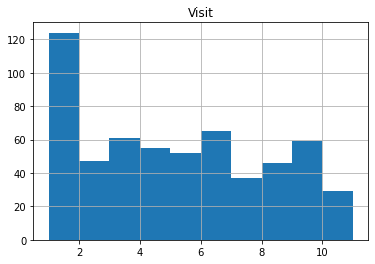

In [4]:
# Read table
#data selection
def report_visit(df, sub_, visit_, group_ ):
    tmp_group=subject_group.copy();
    tmp_group.columns=[sub_, 'Group'];
    df=df.set_index(sub_).join(tmp_group.set_index(sub_), how='left').copy()
    df=df.dropna()
    print(df.groupby(by=sub_).agg(lambda x: set(x)).Group.value_counts())
    grouped=df.groupby(by=sub_).agg(lambda x: len(set(x)))
    grouped['Visit']= grouped[visit_]
    grouped.hist(column=['Visit']);
    #print('Visit counts:', grouped[visit_].value_counts())
    if group_ !="":
        print(df.groupby(by=sub_).agg(lambda x: len(set(x)))[visit_].value_counts())
        print(df.groupby(by=sub_).agg(lambda x: set(x))[visit_].value_counts())
    return df
print('MoCA:')
df_moca=report_visit(ppmi_moca_data, 'PATNO', 'EVENT_ID', 'Group')

Index(['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PDMEDDT',
       'PDMEDTM', 'PDSTATE', 'EXAMTM', 'DBS_STATUS', 'NP3SPCH', 'NP3FACXP',
       'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR',
       'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
       'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT',
       'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
       'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ',
       'NP3RTCON', 'NP3TOT', 'DYSKPRES', 'DYSKIRAT', 'NHY', 'PDTRTMNT',
       'DBSONTM', 'DBSOFFTM', 'HRPOSTMED', 'HRDBSOFF', 'HRDBSON', 'ORIG_ENTRY',
       'LAST_UPDATE'],
      dtype='object')
UPDRS-3:
{PD}           304
{Prodromal}    144
{Control}       90
{SWEDD}         42
Name: Group, dtype: int64
1     69
8     55
2     52
7     48
17    40
9     36
5     34
6     33
14    27
10    27
11    25
16    24
13    22
3     20
12    19
18    17
15    16

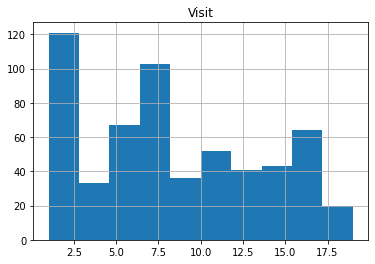

In [5]:
print(ppmi_updrs3_data.columns)
updrs3_list= ['PATNO', 'EVENT_ID', 'NP3SPCH', 'NP3FACXP','NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR',
             'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
             'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT',
             'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
             'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'NP3TOT', 'NHY'];
other_updrs_list = ['DYSKPRES', 'DYSKIRAT'];
ppmi_updrs3_data=ppmi_updrs3_data.loc[:,updrs3_list].copy();
print('UPDRS-3:')
df_updrs3=report_visit(ppmi_updrs3_data, 'PATNO', 'EVENT_ID', 'Group')

Imaging:
Visit counts: 1    250
2    119
4    109
3    103
5      1
Name: Visit, dtype: int64
{PD}           304
{Prodromal}    145
{Control}       91
{SWEDD}         42
Name: Group, dtype: int64


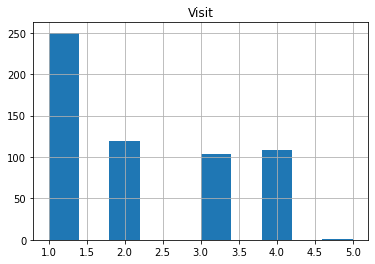

In [6]:
grouped=ppmi_img_dl_data.groupby(by='Subject').agg(lambda x: len(set(x)))
grouped.hist(column=['Visit'])
print('Imaging:')
print('Visit counts:', grouped.Visit.value_counts())
print(ppmi_img_dl_data.groupby(by='Subject').agg(lambda x: set(x)).Group.value_counts())